# 계층적 군집분석

title: "hCluster"  
author: "inryeol"

In [ ]:
# Remove all objects from the environment
%reset -f

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 개요

-   hiercial clustering, 줄여서 hclustering 이라고 함. (한국어로 계보적/계층적 군집분석이라고 함.)
-   고차원의 데이터를 시각화할 때 사용하는 방법
-   요점은 가까이에 있는 대상들을 묶어서 그룹으로 만드는 것.
-   다음과 같은 질문을 던질 수 있다.
    -   `가깝다`를 어떻게 정의할 것인가?
    -   어떻게 묶을 것인가?
    -   그룹을 어떻게 시각화할 것인가?
    -   어떻게 그룹을 해석할 것인가?


# 예시 1

## 데이터 생성

> 데이터를 만들어주고, 시뮬레이션을 수행.


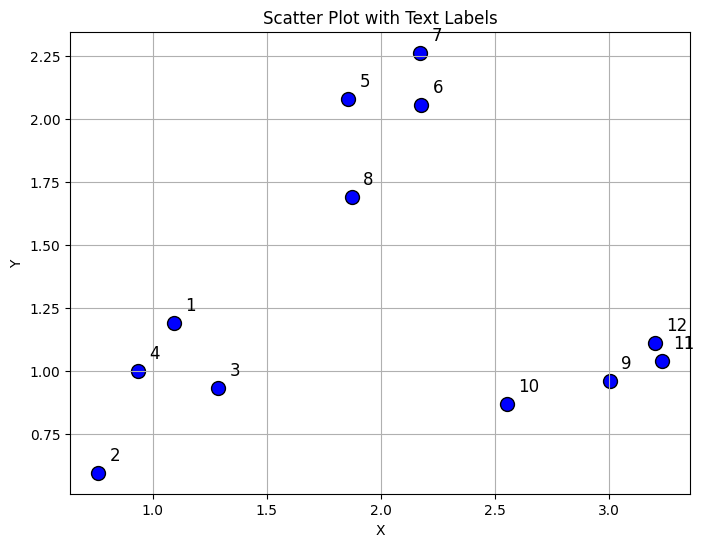

In [2]:
# Setting the seed for reproducibility
np.random.seed(1234)

# Generate random data
x = np.random.normal(loc=np.repeat([1, 2, 3], 4), scale=0.2, size=12)
y = np.random.normal(loc=np.repeat([1, 2, 1], 4), scale=0.2, size=12)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', s=100, edgecolor='black')  # s controls the size of the points

# Add text labels
for i in range(len(x)):
    plt.text(x[i] + 0.05, y[i] + 0.05, str(i + 1), fontsize=12)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Text Labels')

# Show the plot
plt.grid(True)
plt.show()

## 거리행렬 
> 거리행렬을 구해보자.

In [4]:
from scipy.spatial.distance import pdist, squareform

# 데이터 프레임 만들기
dataFrame = np.column_stack((x, y))

# 거리 행렬 계산
rdist_xy = squareform(pdist(dataFrame))

# 대각선 원소를 없애기 위해 큰 값을 더해줍니다
np.fill_diagonal(rdist_xy, np.diag(rdist_xy) + 100000)


> 추가적으로 가장 가까운 점을 표기해보자.


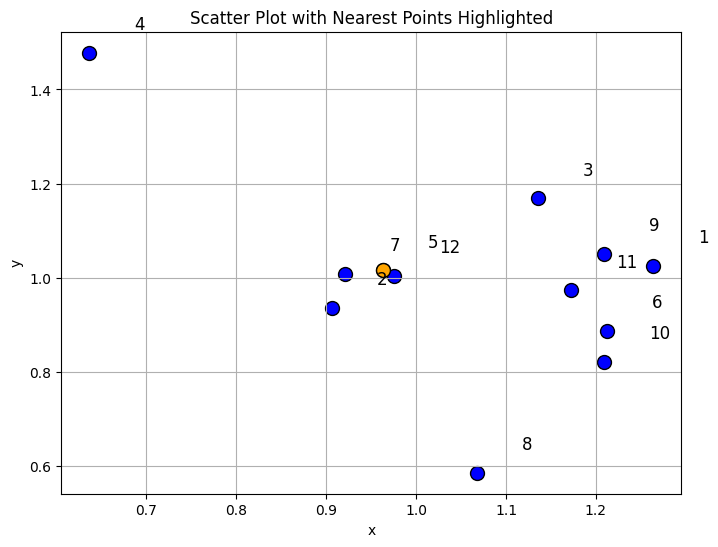

In [5]:
# 데이터
x = np.random.normal(1, 0.2, 12)  # 예시 데이터 (원래 x, y를 설정한 것으로 가정)
y = np.random.normal(1, 0.2, 12)

# 데이터 프레임 만들기
dataFrame = np.column_stack((x, y))

# 거리 행렬 계산
rdist_xy = squareform(pdist(dataFrame))

# 대각선 원소를 없애기 위해 큰 값을 더해줍니다
np.fill_diagonal(rdist_xy, np.diag(rdist_xy) + 100000)

# 가장 가까운 점 찾기
# np.unravel_index는 1차원 인덱스를 다차원 인덱스로 변환합니다
ind1 = np.unravel_index(np.argmin(rdist_xy), rdist_xy.shape)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", s=100, edgecolor='black')  # cex=2는 s=100으로 설정
for i, txt in enumerate(range(1, 13)):
    plt.text(x[i] + 0.05, y[i] + 0.05, str(txt), fontsize=12)

# 가장 가까운 점을 오렌지색으로 표시
plt.scatter(x[ind1[0]], y[ind1[0]], color="orange", s=100, edgecolor='black')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot with Nearest Points Highlighted")
plt.grid(True)
plt.show()

## 덴드로그램 (1)

> 덴드로그램 만들기

In [7]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

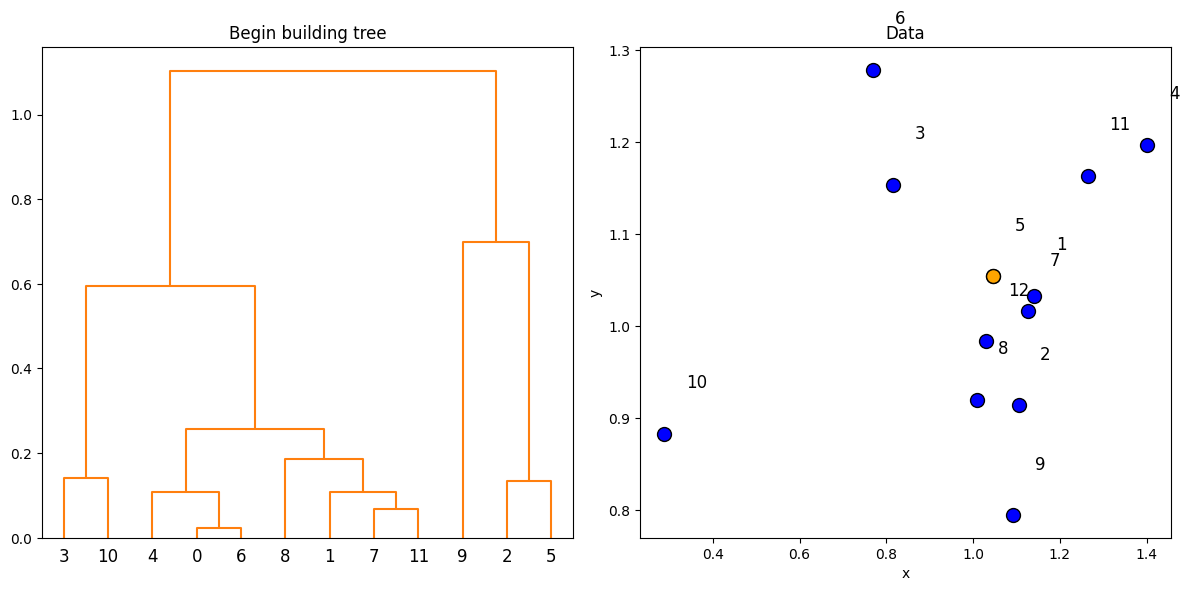

In [8]:
# 데이터 생성
x = np.random.normal(1, 0.2, 12)  # 예시 데이터 (원래 x, y를 설정한 것으로 가정)
y = np.random.normal(1, 0.2, 12)

# 데이터 프레임 만들기
dataFrame = np.column_stack((x, y))

# 거리 행렬 계산
rdist_xy = pdist(dataFrame)

# 덴드로그램 생성
linkage_matrix = sch.linkage(rdist_xy, method='ward')
dendrogram = sch.dendrogram(linkage_matrix, no_plot=True)

# 덴드로그램 자르기
max_d = linkage_matrix[-1, 2] + 0.00001
clusters = sch.fcluster(linkage_matrix, t=max_d, criterion='distance')

# 덴드로그램만 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sch.dendrogram(linkage_matrix, color_threshold=max_d)
plt.title("Begin building tree")

# 데이터 플로팅
plt.subplot(1, 2, 2)
plt.scatter(x, y, color="blue", edgecolor='black', s=100)  # s=100으로 점의 크기 설정
for i, txt in enumerate(range(1, 13)):
    plt.text(x[i] + 0.05, y[i] + 0.05, str(txt), fontsize=12)
    
# 가장 가까운 점을 오렌지색으로 표시
plt.scatter(x[ind1[0]], y[ind1[0]], color="orange", edgecolor='black', s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data")

plt.tight_layout()
plt.show()

## 덴드로그램 (2)
> 이번에는 2번째로 가까운 점을 찾아보자.

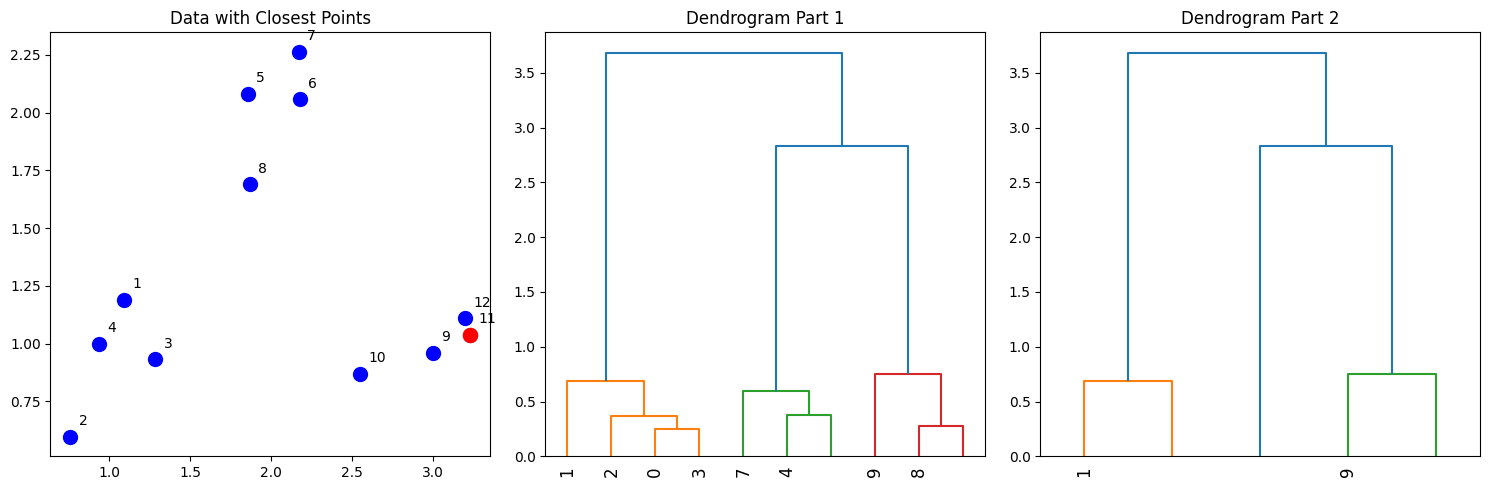

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# 이미 생성된 x와 y 데이터가 있다고 가정
np.random.seed(1234)
x = np.random.normal(np.repeat([1, 2, 3], 4), 0.2)
y = np.random.normal(np.repeat([1, 2, 1], 4), 0.2)

# 데이터프레임 생성
dataFrame = np.column_stack((x, y))

# 거리 행렬 계산
rdist_xy = squareform(pdist(dataFrame))

# 최솟값인 대각 원소에 큰 값 추가
np.fill_diagonal(rdist_xy, np.inf)

# 가장 가까운 점 찾기
ind1 = np.unravel_index(np.argmin(rdist_xy), rdist_xy.shape)

# 두 번째로 가까운 점 찾기
nextmin = np.partition(rdist_xy.ravel(), 1)[1]
ind2 = np.unravel_index(np.argmin(np.abs(rdist_xy - nextmin)), rdist_xy.shape)

# 계층적 군집화 수행
Z = linkage(dataFrame, method='ward')

# 덴드로그램 자르기 (두 번째로 높은 클러스터에서 자르기)
cut_height = Z[1, 2] + 0.00001
cut_tree_result = cut_tree(Z, height=cut_height)

# 덴드로그램 자른 결과에서 하위 덴드로그램 찾기
lower_dendrograms = np.unique(cut_tree_result)

# 플롯
plt.figure(figsize=(15, 5))

# 첫 번째 서브플롯: 원본 데이터 플롯
plt.subplot(1, 3, 1)
plt.scatter(x, y, color='blue', s=100)
for i, txt in enumerate(range(1, 13)):
    plt.annotate(txt, (x[i] + 0.05, y[i] + 0.05))
plt.scatter(x[ind1[0]], y[ind1[0]], color='orange', s=100)
plt.scatter(x[ind2[0]], y[ind2[0]], color='red', s=100)
plt.title('Data with Closest Points')

# 두 번째 서브플롯: 덴드로그램의 한 파트 플롯
plt.subplot(1, 3, 2)
dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram Part 1')

# 세 번째 서브플롯: 덴드로그램의 또 다른 파트 플롯
plt.subplot(1, 3, 3)
dendrogram(Z, truncate_mode='lastp', p=5, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram Part 2')

plt.tight_layout()
plt.show()

## 히트맵
> 히트맵을 이용해서 보자.

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

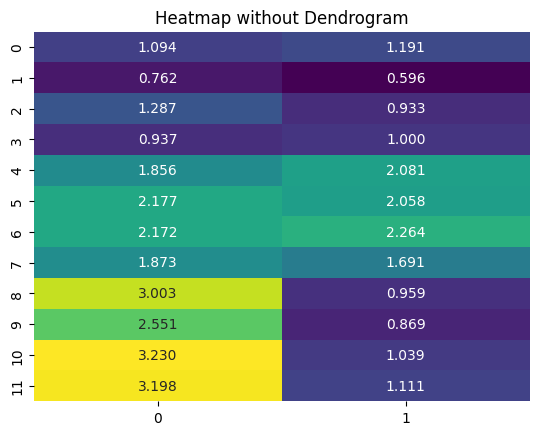

In [27]:
# 히트맵 그리기 (density.info = 'none'에 해당하는 부분)
sns.heatmap(dataFrame, annot=True, fmt=".3f", cmap='viridis', cbar=False)
plt.title('Heatmap without Dendrogram')
plt.show()

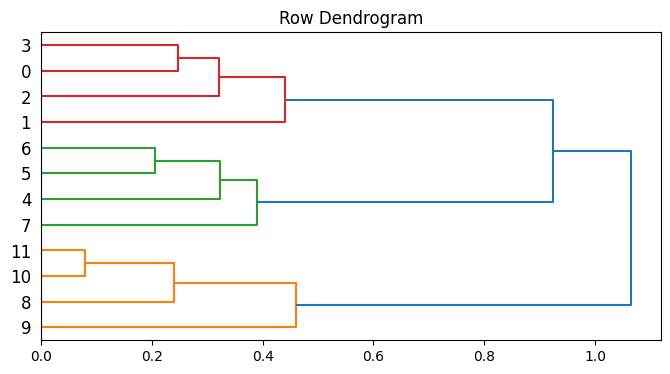

In [28]:
# 덴드로그램 포함한 히트맵 그리기
linkage_matrix = linkage(pdist(dataFrame), method='single')

# 행의 덴드로그램
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, orientation='right')
plt.title('Row Dendrogram')
plt.show()

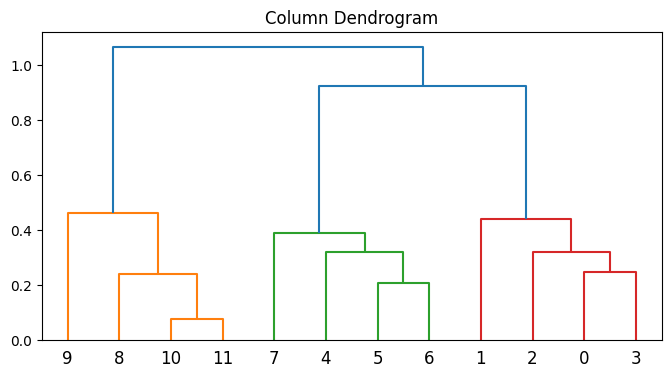

In [29]:
# 열의 덴드로그램
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title('Column Dendrogram')
plt.show()

# 예시 2

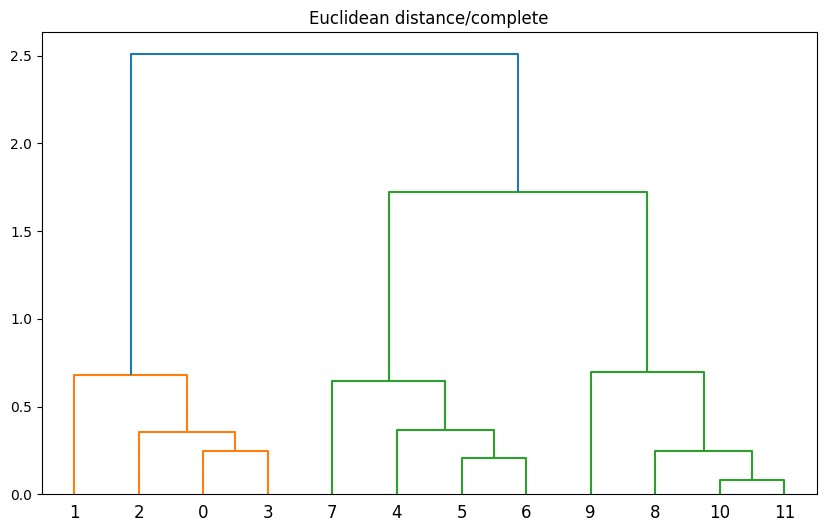

In [31]:
hc1 = linkage(pdist(dataFrame), method='complete')
plt.figure(figsize=(10, 6))
dendrogram(hc1)
plt.title("Euclidean distance/complete")
plt.show()

# 첫 번째 클러스터링 결과 자르기
cut_hc1 = cut_tree(hc1, height=hc1[0, 2] + 0.00001)

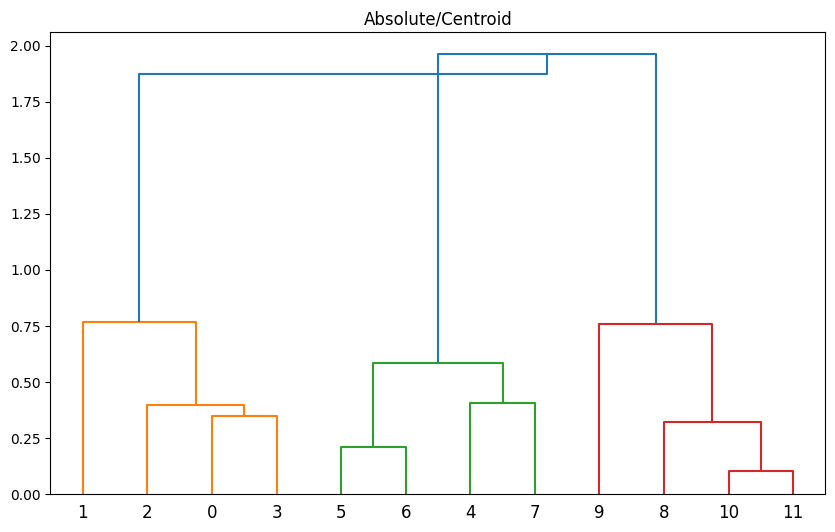

In [32]:
# 거리: 절대값(맨하탄 거리), linkage: centroid
hc2 = linkage(pdist(dataFrame, metric='cityblock'), method='centroid')
plt.figure(figsize=(10, 6))
dendrogram(hc2)
plt.title("Absolute/Centroid")
plt.show()

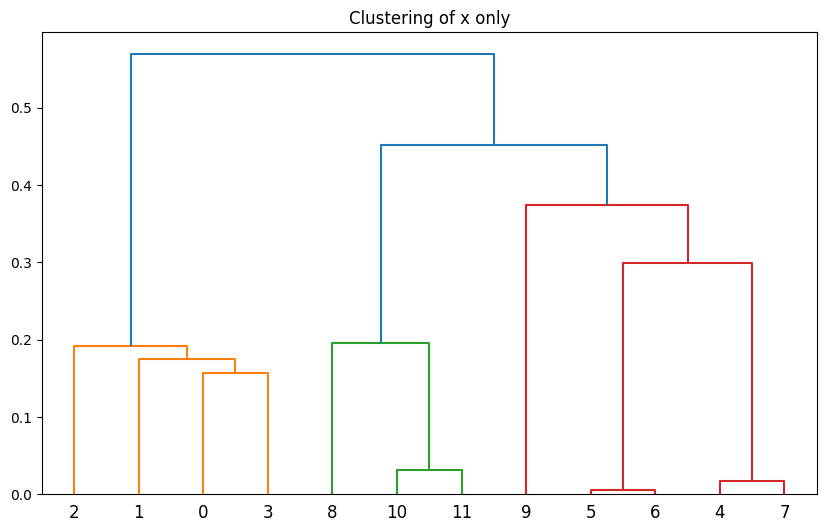

In [33]:
# x만 클러스터링
hc_x = linkage(pdist(x[:, np.newaxis]), method='single')
plt.figure(figsize=(10, 6))
dendrogram(hc_x)
plt.title("Clustering of x only")
plt.show()

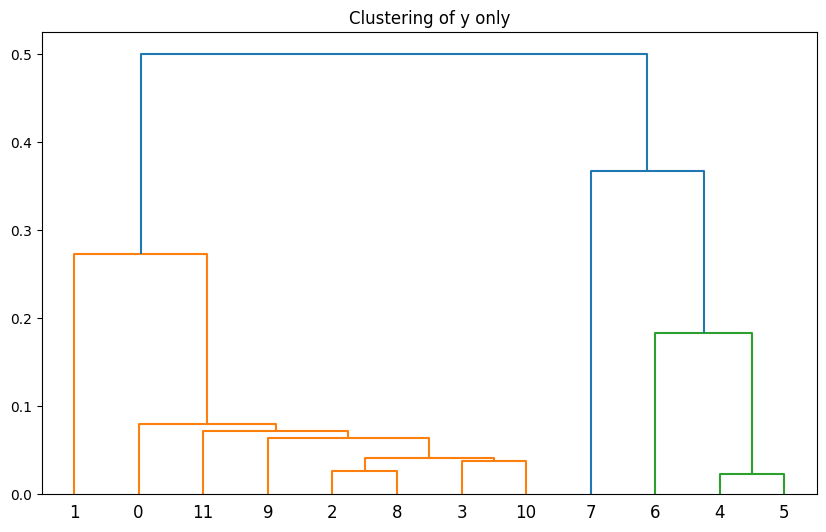

In [34]:
# y만 클러스터링
hc_y = linkage(pdist(y[:, np.newaxis]), method='single')
plt.figure(figsize=(10, 6))
dendrogram(hc_y)
plt.title("Clustering of y only")
plt.show()

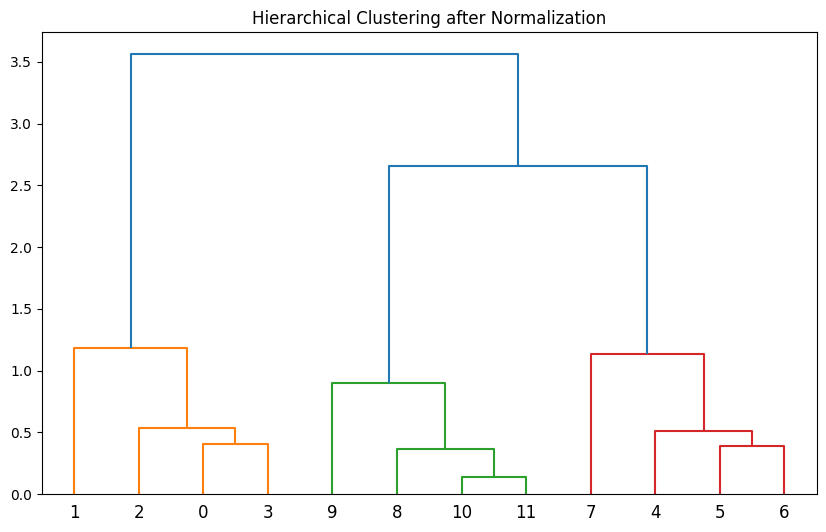

In [35]:
# 정규화 후 클러스터링
dataFrame2 = (dataFrame - np.mean(dataFrame, axis=0)) / np.std(dataFrame, axis=0)
hc4 = linkage(pdist(dataFrame2), method='complete')
plt.figure(figsize=(10, 6))
dendrogram(hc4)
plt.title("Hierarchical Clustering after Normalization")
plt.show()